# NLTK Chapter 2: corpora

![](https://imgs.xkcd.com/comics/words_for_small_sets.png)

## Loading your own corpus

In [54]:
from nltk.corpus import PlaintextCorpusReader

In [113]:
# Here we set the location of the corpora folder you would like to work with
corpora_folder = '/var/www/html/vlp_data/corpora/test'

# Here you load this corpus
# The last string in the line below is a special one, it uses a regular expression to match a pattern; we will look into them later this trimester!
corpus = PlaintextCorpusReader(corpora_folder, '^\w.*\.txt') 

In [114]:
corpus.fileids()

['queer-phenomenology.txt', 'stochastic-parrots.txt']

In [65]:
corpus.sents()

[['What', 'does', 'it', 'mean', 'to', 'be', 'oriented', '?'], ['How', 'is', 'it', 'that', 'we', 'come', 'to', 'find', 'our', 'way', 'in', 'a', 'world', 'that', 'acquires', 'new', 'shapes', ',', 'depending', 'on', 'which', 'way', 'we', 'turn', '?'], ...]

In [69]:
len(corpus.sents())

16

In [66]:
corpus.raw()

'What does it mean to be oriented? \nHow is it that we come to find our way in a world that acquires new shapes, depending on which way we turn? \nIf we know where we are, when we turn this way or that, then we are oriented. \nWe have our bearings. \nWe know what to do to get to this place or to that. \nTo be oriented is also to be oriented toward certain objects, those that help us find our way. \nThese are the objects we recognize, such that when we face them, we know which way we are facing. \nThey gather on the ground and also create a ground on which we can gather. \nYet objects gather quite differently, creating different grounds. \nWhat difference does it make what we are oriented toward?\n\nThe past 3 years of work in NLP have been characterized by the development and deployment of ever larger language models, especially for English. \nBERT, its variants, GPT-2/3, and others, most recently Switch-C, have pushed the boundaries of the possible both through architectural innovatio

In [67]:
corpus.words()

['What', 'does', 'it', 'mean', 'to', 'be', 'oriented', ...]

In [68]:
len(corpus.words())

350

## Using your corpus in NLTK (to do NLTK things like concordances, generate text, similar words, etc)

### Making a NLTK Text() object

To work with your corpus and to use some of the NLTK functionalities we looked at in Chapter 1 (https://www.nltk.org/book/ch01.html), we will need to turn our corpus in a **Text()** object.

In [216]:
import nltk

my_text = nltk.Text(corpus.words())

In [217]:
my_text

<Text: What does it mean to be oriented ?...>

With this Text() object (saved in the variable `my_text`) we can use the functions of the NLTK library, such as word counts, generating text, word collocations, etc.

![](https://imgs.xkcd.com/comics/adjectives.png)

### word concordances

In [138]:
my_text.concordance('for')

Displaying 4 of 4 matches:
r larger language models , especially for English . BERT , its variants , GPT -
the methodology of fine - tuning them for specific tasks , researchers have ext
y leaderboards on specific benchmarks for English . In this paper , we take a s
chnology and what paths are available for mitigating those risks ? We provide r


### calculated word similarity

In [139]:
my_text.similar("and")

### common contexts of two words

(is only able to find common contexts if you have enough words in your corpus)

In [162]:
my_text.common_contexts(["larger", "models"])

No common contexts were found


### common word combincations: collocations

> A collocation is a sequence of words that occur together unusually often. Thus red wine is a collocation, whereas the wine is not. A characteristic of collocations is that they are resistant to substitution with words that have similar senses; for example, maroon wine sounds definitely odd.

In [163]:
my_text.collocations()

ever larger; larger language; language models; oriented toward


### where do words appear in a text? dispersion plotting

In [141]:
my_text.dispersion_plot(["methodology", "world", "researchers", "English", "we"])

### generate texts based on your corpus

In [144]:
my_text.generate()

mitigating those risks ? , such that when we turn ? been characterized
by the development and deployment of ever larger language models ,
especially for English . How big is too big ? to do to get to this
place or to that . and encouraging research directions beyond ever
larger language models , especially for English . get to this place or
to that . . evaluating how the planned approach fits into research and
development goals and supports stakeholder values , and others , most
recently Switch - C , have pushed the boundaries of the art


'mitigating those risks ? , such that when we turn ? been characterized\nby the development and deployment of ever larger language models ,\nespecially for English . How big is too big ? to do to get to this\nplace or to that . and encouraging research directions beyond ever\nlarger language models , especially for English . get to this place or\nto that . . evaluating how the planned approach fits into research and\ndevelopment goals and supports stakeholder values , and others , most\nrecently Switch - C , have pushed the boundaries of the art'

### tokens that make your corpus

In [145]:
sorted(set(my_text))

[',',
 '-',
 '.',
 '/',
 '2',
 '3',
 ':',
 '?',
 'BERT',
 'C',
 'English',
 'GPT',
 'How',
 'If',
 'In',
 'NLP',
 'Switch',
 'The',
 'These',
 'They',
 'To',
 'Using',
 'We',
 'What',
 'Yet',
 'a',
 'acquires',
 'also',
 'and',
 'approach',
 'architectural',
 'are',
 'array',
 'art',
 'as',
 'ask',
 'associated',
 'available',
 'back',
 'be',
 'bearings',
 'been',
 'benchmarks',
 'beyond',
 'big',
 'both',
 'boundaries',
 'by',
 'can',
 'carefully',
 'carrying',
 'certain',
 'characterized',
 'come',
 'costs',
 'create',
 'creating',
 'curating',
 'datasets',
 'depending',
 'deployment',
 'development',
 'difference',
 'different',
 'differently',
 'directions',
 'do',
 'documenting',
 'does',
 'encouraging',
 'environmental',
 'especially',
 'evaluating',
 'ever',
 'everything',
 'exercises',
 'extended',
 'face',
 'facing',
 'financial',
 'find',
 'fine',
 'first',
 'fits',
 'for',
 'gather',
 'get',
 'goals',
 'ground',
 'grounds',
 'have',
 'help',
 'how',
 'in',
 'including',
 'in

### lexical diversity

In [149]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [150]:
lexical_diversity(my_text)

0.5228571428571429

### word counts

In [148]:
my_text.count("we")

13

### word counts in another way: frequency distributions

In [177]:
from nltk.book import FreqDist

fdist_words = FreqDist(my_text)
fdist_words

FreqDist({',': 18, 'we': 13, 'the': 12, 'and': 12, '.': 11, 'to': 7, 'are': 7, 'that': 6, 'on': 6, 'of': 6, ...})

In [178]:
fdist_words.most_common(50)

[(',', 18),
 ('we', 13),
 ('the', 12),
 ('and', 12),
 ('.', 11),
 ('to', 7),
 ('are', 7),
 ('that', 6),
 ('on', 6),
 ('of', 6),
 ('oriented', 5),
 ('?', 5),
 ('way', 5),
 ('a', 4),
 ('this', 4),
 ('have', 4),
 ('for', 4),
 ('-', 4),
 ('What', 3),
 ('it', 3),
 ('be', 3),
 ('is', 3),
 ('our', 3),
 ('which', 3),
 ('know', 3),
 ('We', 3),
 ('what', 3),
 ('objects', 3),
 ('gather', 3),
 ('development', 3),
 ('models', 3),
 ('does', 2),
 ('How', 2),
 ('find', 2),
 ('in', 2),
 ('turn', 2),
 ('when', 2),
 ('or', 2),
 ('also', 2),
 ('toward', 2),
 ('those', 2),
 ('them', 2),
 ('ground', 2),
 ('3', 2),
 ('by', 2),
 ('ever', 2),
 ('larger', 2),
 ('language', 2),
 ('English', 2),
 ('possible', 2)]

In [198]:
fdist_words.plot()

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [180]:
fdist_words['world']

1

In [193]:
fdist_words.tabulate(samples=my_text[:10])

    What     does       it     mean       to       be oriented        ?      How       is 
       3        2        3        1        7        3        5        5        2        3 


In [194]:
fdist_words.tabulate(samples=my_text[10:20])

  it that   we come   to find  our  way   in    a 
   3    6   13    1    7    2    3    5    2    4 


In [195]:
step = 10
for iteration in range(0, len(my_text), step):
    fdist_words.tabulate(samples=my_text[iteration:iteration+step])

    What     does       it     mean       to       be oriented        ?      How       is 
       3        2        3        1        7        3        5        5        2        3 
  it that   we come   to find  our  way   in    a 
   3    6   13    1    7    2    3    5    2    4 
    world      that  acquires       new    shapes         , depending        on     which       way 
        1         6         1         1         1        18         1         6         3         5 
   we  turn     ?    If    we  know where    we   are     , 
   13     2     5     1    13     3     1    13     7    18 
when   we turn this  way   or that    , then   we 
   2   13    2    4    5    2    6   18    1   13 
     are oriented        .       We     have      our bearings        .       We     know 
       7        5       11        3        4        3        1       11        3        3 
 what    to    do    to   get    to  this place    or    to 
    3     7     1     7     1     7     4     1

### long words

In [158]:
vocabulary = set(my_text)
long_words = [w for w in vocabulary if len(w) > 8]
sorted(long_words)

['architectural',
 'associated',
 'available',
 'benchmarks',
 'boundaries',
 'carefully',
 'characterized',
 'depending',
 'deployment',
 'development',
 'difference',
 'different',
 'differently',
 'directions',
 'documenting',
 'encouraging',
 'environmental',
 'especially',
 'evaluating',
 'everything',
 'exercises',
 'financial',
 'including',
 'ingesting',
 'innovations',
 'investing',
 'leaderboards',
 'methodology',
 'mitigating',
 'pretrained',
 'recognize',
 'recommendations',
 'researchers',
 'resources',
 'stakeholder',
 'technology']

### counting word lengths

In [166]:
word_lengths = [len(w) for w in my_text]
print(word_lengths)

[4, 4, 2, 4, 2, 2, 8, 1, 3, 2, 2, 4, 2, 4, 2, 4, 3, 3, 2, 1, 5, 4, 8, 3, 6, 1, 9, 2, 5, 3, 2, 4, 1, 2, 2, 4, 5, 2, 3, 1, 4, 2, 4, 4, 3, 2, 4, 1, 4, 2, 3, 8, 1, 2, 4, 3, 8, 1, 2, 4, 4, 2, 2, 2, 3, 2, 4, 5, 2, 2, 4, 1, 2, 2, 8, 2, 4, 2, 2, 8, 6, 7, 7, 1, 5, 4, 4, 2, 4, 3, 3, 1, 5, 3, 3, 7, 2, 9, 1, 4, 4, 4, 2, 4, 4, 1, 2, 4, 5, 3, 2, 3, 6, 1, 4, 6, 2, 3, 6, 3, 4, 6, 1, 6, 2, 5, 2, 3, 6, 1, 3, 7, 6, 5, 11, 1, 8, 9, 7, 1, 4, 10, 4, 2, 4, 4, 2, 3, 8, 6, 1, 3, 4, 1, 5, 2, 4, 2, 3, 4, 4, 13, 2, 3, 11, 3, 10, 2, 4, 6, 8, 6, 1, 10, 3, 7, 1, 4, 1, 3, 8, 1, 3, 1, 1, 1, 1, 1, 3, 6, 1, 4, 8, 6, 1, 1, 1, 4, 6, 3, 10, 2, 3, 8, 4, 7, 13, 11, 3, 7, 5, 4, 1, 5, 5, 10, 6, 3, 3, 11, 2, 4, 1, 6, 4, 3, 8, 5, 1, 11, 4, 8, 3, 5, 2, 3, 3, 2, 1, 4, 5, 2, 5, 2, 8, 2, 12, 2, 8, 10, 3, 7, 1, 2, 4, 5, 1, 2, 4, 1, 4, 4, 3, 3, 1, 3, 3, 2, 3, 3, 1, 4, 3, 3, 8, 5, 10, 4, 4, 10, 3, 4, 5, 3, 9, 3, 10, 5, 5, 1, 2, 7, 15, 9, 8, 3, 13, 3, 9, 5, 5, 1, 9, 9, 4, 8, 3, 9, 11, 8, 6, 4, 9, 10, 2, 3, 3, 1, 8, 3, 3, 1, 11, 9, 10, 3

In [183]:
fdist_word_lengths = FreqDist(len(w) for w in my_text)
fdist_word_lengths.most_common()

[(4, 62),
 (3, 62),
 (2, 56),
 (1, 48),
 (8, 26),
 (5, 25),
 (6, 22),
 (10, 12),
 (9, 11),
 (7, 11),
 (11, 10),
 (13, 3),
 (12, 1),
 (15, 1)]

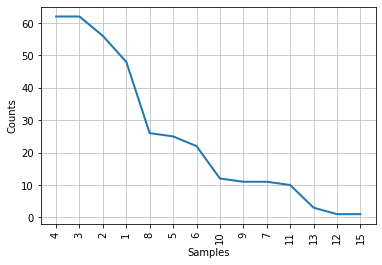

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [184]:
fdist_word_lengths.plot()

In [185]:
fdist_word_lengths.tabulate()

 4  3  2  1  8  5  6 10  9  7 11 13 12 15 
62 62 56 48 26 25 22 12 11 11 10  3  1  1 


### filter: ends with

In [201]:
sorted(w for w in set(my_text) if w.endswith('able'))

['available']

In [207]:
sorted(w for w in set(my_text) if w.endswith('ly'))

['carefully', 'differently', 'especially', 'recently']

### filter: starts with

In [214]:
sorted(w for w in set(my_text) if w.startswith('sh'))

['shapes', 'sheer']

### filter: if 'XXX' is in the word

In [209]:
sorted(term for term in set(my_text) if 're' in term)

['acquires',
 'are',
 'carefully',
 'create',
 'creating',
 'difference',
 'different',
 'differently',
 'directions',
 'measured',
 'pre',
 'pretrained',
 'recently',
 'recognize',
 'recommendations',
 'research',
 'researchers',
 'resources',
 'where']

### filter: if Title

In [210]:
sorted(item for item in set(my_text) if item.istitle())

['C',
 'English',
 'How',
 'If',
 'In',
 'Switch',
 'The',
 'These',
 'They',
 'To',
 'Using',
 'We',
 'What',
 'Yet']

### filter: if digit

In [211]:
sorted(item for item in set(my_text) if item.isdigit())

['2', '3']

## Looking at the NLTK example corpora

In [108]:
import nltk.corpus
dir(nltk.corpus)

['AlignedCorpusReader',
 'AlpinoCorpusReader',
 'BNCCorpusReader',
 'BracketParseCorpusReader',
 'CHILDESCorpusReader',
 'CMUDictCorpusReader',
 'CategorizedBracketParseCorpusReader',
 'CategorizedCorpusReader',
 'CategorizedPlaintextCorpusReader',
 'CategorizedSentencesCorpusReader',
 'CategorizedTaggedCorpusReader',
 'ChasenCorpusReader',
 'ChunkedCorpusReader',
 'ComparativeSentencesCorpusReader',
 'ConllChunkCorpusReader',
 'ConllCorpusReader',
 'CorpusReader',
 'CrubadanCorpusReader',
 'DependencyCorpusReader',
 'EuroparlCorpusReader',
 'FramenetCorpusReader',
 'IEERCorpusReader',
 'IPIPANCorpusReader',
 'IndianCorpusReader',
 'KNBCorpusReader',
 'LazyCorpusLoader',
 'LinThesaurusCorpusReader',
 'MTECorpusReader',
 'MWAPPDBCorpusReader',
 'MacMorphoCorpusReader',
 'NKJPCorpusReader',
 'NPSChatCorpusReader',
 'NombankCorpusReader',
 'NonbreakingPrefixesCorpusReader',
 'OpinionLexiconCorpusReader',
 'PPAttachmentCorpusReader',
 'PanLexLiteCorpusReader',
 'PanlexSwadeshCorpusReader',

In [75]:
from nltk.corpus import subjectivity

In [83]:
import nltk
nltk.download('subjectivity')

[nltk_data] Downloading package subjectivity to
[nltk_data]     /home/manetta/nltk_data...
[nltk_data]   Unzipping corpora/subjectivity.zip.


True

In [87]:
subjectivity.categories()

['obj', 'subj']

In [88]:
subjectivity.sents()

[['the', 'movie', 'begins', 'in', 'the', 'past', 'where', 'a', 'young', 'boy', 'named', 'sam', 'attempts', 'to', 'save', 'celebi', 'from', 'a', 'hunter', '.'], ['emerging', 'from', 'the', 'human', 'psyche', 'and', 'showing', 'characteristics', 'of', 'abstract', 'expressionism', ',', 'minimalism', 'and', 'russian', 'constructivism', ',', 'graffiti', 'removal', 'has', 'secured', 'its', 'place', 'in', 'the', 'history', 'of', 'modern', 'art', 'while', 'being', 'created', 'by', 'artists', 'who', 'are', 'unconscious', 'of', 'their', 'artistic', 'achievements', '.'], ...]

In [89]:
len(subjectivity.words())

240576

In [100]:
! ls /home/manetta/nltk_data/

corpora


In [101]:
! ls /home/manetta/nltk_data/corpora

subjectivity  subjectivity.zip


In [102]:
! ls /home/manetta/nltk_data/corpora/subjectivity

plot.tok.gt9.5000  quote.tok.gt9.5000  README.txt


In [98]:
! cat /home/manetta/nltk_data/corpora/subjectivity/README.txt

Subjectivity Dataset v1.0

Available as 'subjectivity dataset v1.0' from http://www.cs.cornell.edu/People/pabo/people/pabo/movie-review-data

Source:
http://www.cs.cornell.edu/people/pabo/movie-review-data/rotten_imdb.tar.gz

Attribution:
"subjectivity dataset v1.0 by Bo Pang
[https://sites.google.com/site/bopang42/] and
Lillian Lee [http://www.cs.cornell.edu/home/llee/] is licensed under CC BY 4.0
International [http://creativecommons.org/licenses/by/4.0/]"

NB: Line-endings have been converted from DOS to Unix. Some characters
have been converted from ISO-8859-1 to UTF-8. Occurences of NEL
Unicode character (\x85) were replaced by a single whitespace.


Introduction

This README v1.0 (June, 2004) for the v1.0 subjectivity dataset comes
from the URL
http://www.cs.cornell.edu/people/pabo/movie-review-data .


Citation Info 

This data was first used in Bo Pang and Lillian Lee,
``A Sentimental Education: Sentiment Analysis Using Subjectivity Summarization 
Based on Minimum Cuts'', Proce

In [103]:
! cat /home/manetta/nltk_data/corpora/subjectivity/plot.tok.gt9.5000

the movie begins in the past where a young boy named sam attempts to save celebi from a hunter . 
emerging from the human psyche and showing characteristics of abstract expressionism , minimalism and russian constructivism , graffiti removal has secured its place in the history of modern art while being created by artists who are unconscious of their artistic achievements . 
spurning her mother's insistence that she get on with her life , mary is thrown out of the house , rejected by joe , and expelled from school as she grows larger with child . 
amitabh can't believe the board of directors and his mind is filled with revenge and what better revenge than robbing the bank himself , ironic as it may sound . 
she , among others excentricities , talks to a small rock , gertrude , like if she was alive . 
this gives the girls a fair chance of pulling the wool over their eyes using their sexiness to poach any last vestige of common sense the dons might have had . 
styled after vh1's " behin

In [105]:
! cat /home/manetta/nltk_data/corpora/subjectivity/quote.tok.gt9.5000

smart and alert , thirteen conversations about one thing is a small gem . 
color , musical bounce and warm seas lapping on island shores . and just enough science to send you home thinking . 
it is not a mass-market entertainment but an uncompromising attempt by one artist to think about another . 
a light-hearted french film about the spiritual quest of a fashion model seeking peace of mind while in a love affair with a veterinarian who is a non-practicing jew . 
my wife is an actress has its moments in looking at the comic effects of jealousy . in the end , though , it is only mildly amusing when it could have been so much more . 
works both as an engaging drama and an incisive look at the difficulties facing native americans . 
even a hardened voyeur would require the patience of job to get through this interminable , shapeless documentary about the swinging subculture . 
when perry fists a bull at the moore farm , it's only a matter of time before he gets the upper hand in matters 

Try to load another one and see if you can find the plain text files?